# Seaborn Exercises

In [1]:
#notebook configuration
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

## Part 1: Use the iris database to answer the following quesitons:

In [2]:
# load iris database
iris = sns.load_dataset('iris')

data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#preview iris db
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
44,5.1,3.8,1.9,0.4,setosa
65,6.7,3.1,4.4,1.4,versicolor
94,5.6,2.7,4.2,1.3,versicolor
99,5.7,2.8,4.1,1.3,versicolor
28,5.2,3.4,1.4,0.2,setosa
138,6.0,3.0,4.8,1.8,virginica
85,6.0,3.4,4.5,1.6,versicolor
53,5.5,2.3,4.0,1.3,versicolor
115,6.4,3.2,5.3,2.3,virginica
92,5.8,2.6,4.0,1.2,versicolor


### 1. What does the distribution of petal lengths look like?

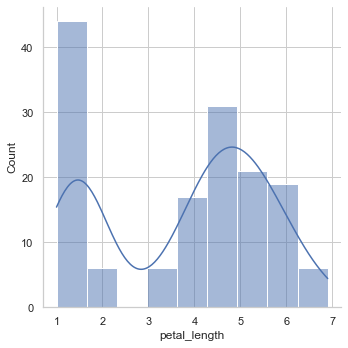

In [135]:
sns.displot(iris.petal_length, kde=True)

plt.show()

### 2. Is there a correlation between petal length and petal width?

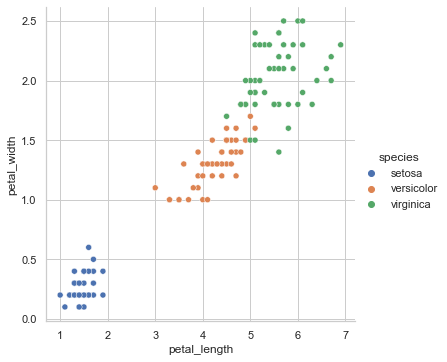

In [136]:
sns.relplot(data = iris, x ='petal_length', y  ='petal_width', hue='species')

#There is a correlation between petal length and petal width for each species

### 3. Would it be reasonable to predict species based on sepal width and sepal length?

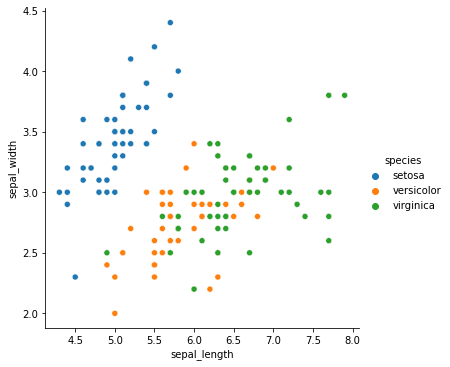

In [7]:
sns.relplot(data = iris, x ='sepal_length', y  ='sepal_width', hue='species')

#Possibly. Sepal width and length overlap more than petal length and petal width. 

### 4. Which features would be best used to predict species?

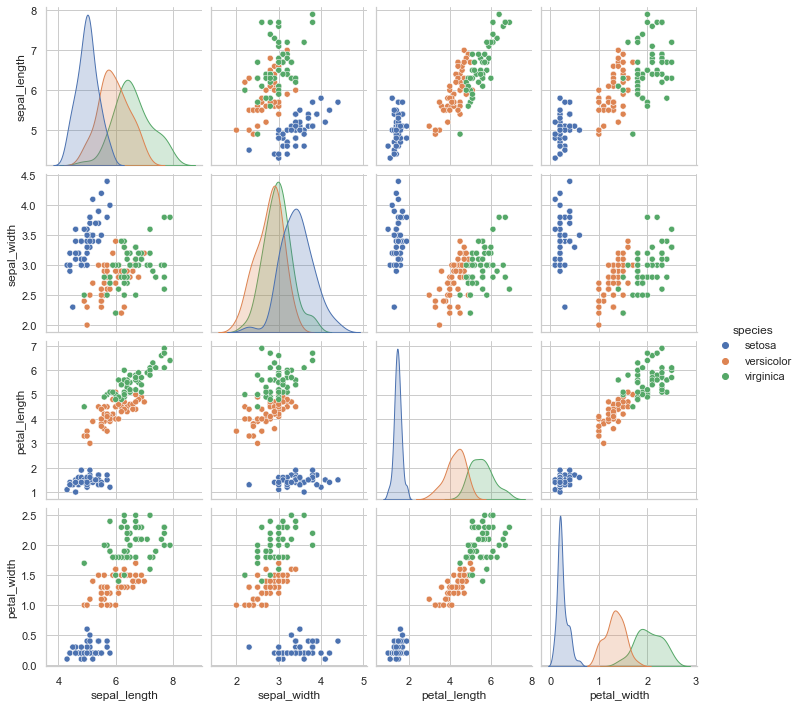

In [139]:
sns.pairplot(iris, hue='species')

plt.show()

## Part 2: Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

In [9]:
anscombe = sns.load_dataset('anscombe')
data('anscombe', show_doc=True)

anscombe

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Anscombe's Quartet of ‘Identical’ Simple Linear Regressions

### Description

Four _x_-_y_ datasets which have the same traditional statistical properties
(mean, variance, correlation, regression line, etc.), yet are quite different.

### Usage

    anscombe

### Format

A data frame with 11 observations on 8 variables.

x1 == x2 == x3

the integers 4:14, specially arranged

x4

values 8 and 19

y1, y2, y3, y4

numbers in (3, 12.5) with mean 7.5 and sdev 2.03

### Source

Tufte, Edward R. (1989) _The Visual Display of Quantitative Information_,
13–14. Graphics Press.

### References

Anscombe, Francis J. (1973) Graphs in statistical analysis. _American
Statistician_, **27**, 17–21.

### Examples

    require(stats); require(graphics)
    summary(anscombe)
    ##-- now some "magic" to do the 4 regressions in a loop:
    ff <- y ~ x
    mods <- setNames(as.list(1:4), paste0("lm", 1:4))
 

In [10]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


## 1. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [11]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

#### My Observations:
- The x mean and x std is the same for all datasets.
- In general, the summary stats for x are the same across datasets, with the exception of dataset 4. 
    - There may be some outliers in dataset 4
- The y mean and y std are reatively close but slightly different across the datsets.
- There is greater spread between y data points in all datasets

In [12]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


- **Plot the x and y values from the anscombe data. Each dataset should be in a separate column.**

<Figure size 864x720 with 0 Axes>

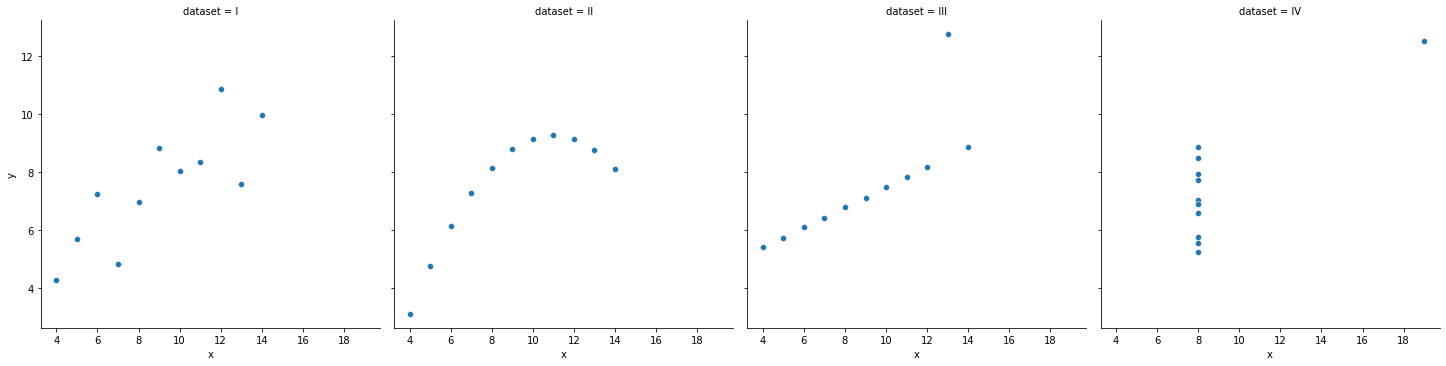

In [13]:
plt.figure(figsize=(12,10))
sns.relplot(x='x', y='y', data=anscombe, col='dataset')


## 2. Load the InsectSprays dataset and read it's documentation. 

In [14]:
InsectSprays = data('InsectSprays')

In [15]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [16]:
InsectSprays.sample(10)

,count,spray
12,13,A
34,0,C
45,5,D
54,6,E
22,21,B
25,0,C
44,5,D
11,14,A
35,1,C
51,3,E


In [17]:
InsectSprays.describe()

,count
count,72.000000
mean,9.500000
std,7.203286
min,0.000000
25%,3.000000
50%,7.000000
75%,14.250000
max,26.000000


- **Create a boxplot that shows the effectiveness of the different insect sprays.**

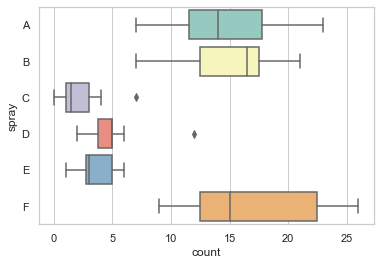

In [18]:
sns.set_theme(style="whitegrid")
sns.boxplot(data = InsectSprays, x='count', y='spray', palette='Set3')

plt.show()

## 3. Load the swiss dataset and read it's documentation. 

In [19]:
swiss = data('swiss')

In [20]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [21]:
swiss.sample(5)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Nyone,56.6,50.9,22,12,15.14,16.7
Entremont,69.3,84.9,7,6,99.68,19.8
V. De Geneve,35.0,1.2,37,53,42.34,18.0
St Maurice,65.0,75.9,9,9,99.06,17.8
Herens,77.3,89.7,5,2,100.00,18.3


### Create visualizations to answer the following questions:

- **Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)**

Text(0.5, 8.95999999999998, 'Catholic %')

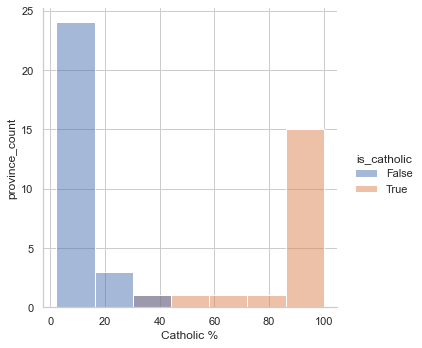

In [22]:
swiss['is_catholic']=swiss.Catholic >= 40

sns.displot(data=swiss, x='Catholic', hue='is_catholic')
plt.ylabel('province_count')
plt.xlabel('Catholic %')

- **Does whether or not a province is Catholic influence fertility?**

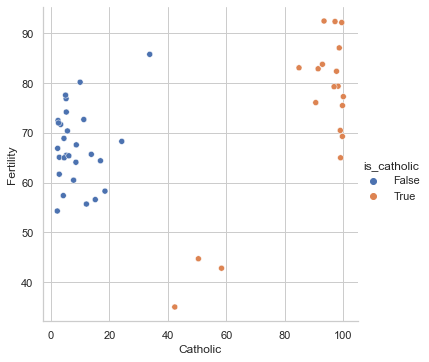

In [23]:
sns.relplot(data=swiss, x='Catholic', y='Fertility', hue='is_catholic')

- **What measure correlates most strongly with fertility?**

In [24]:
swiss = swiss.drop(columns=['is_catholic'])

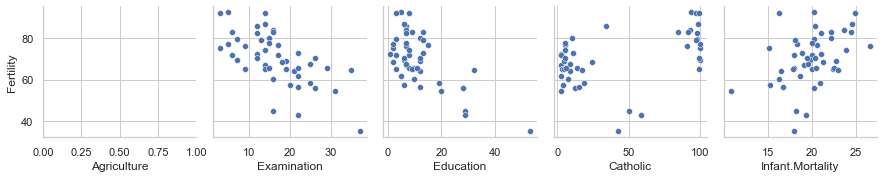

In [25]:
sns.pairplot(data=swiss,
            x_vars=['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality'],
            y_vars=['Fertility'])

In [140]:
# There is a function to see the correlation coefficient: 
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


## 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [26]:
from env import host, user, password

def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/chipotle'

In [27]:
sql = """
select *
from orders
"""

chipotle_orders = pd.read_sql(sql, get_db_url('orders'))

In [28]:
chipotle_orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [30]:
#convert item_price series to a float
chipotle_orders.item_price = chipotle_orders.item_price.str.replace('$', ' ').astype('float')


In [66]:
# find the top 4 sellers
top_sellers = chipotle_orders.groupby('item_name').item_price.sum().round().nlargest(4)

In [67]:
type(top_sellers)

pandas.core.series.Series

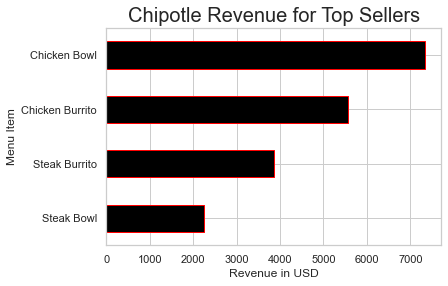

In [109]:
top_sellers.plot(kind='barh',
                color='black',
                ec='red')
plt.title('Chipotle Revenue for Top Sellers', fontsize=20)
plt.ylabel('Menu Item')
plt.xlabel('Revenue in USD')

#order y-axis items by descending to see #1 top seller on top
plt.gca().invert_yaxis()

plt.show()

## 5. Load the sleepstudy data and read it's documentation. 

In [79]:
sleepstudy = data('sleepstudy')
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [80]:
sleepstudy.sample(10)

,Reaction,Days,Subject
177,334.4818,6,372
161,269.8804,0,371
33,283.8565,2,330
156,344.1937,5,370
37,280.2396,6,330
87,245.4523,6,335
80,377.2990,9,334
30,247.5153,9,310
47,290.0750,6,331
170,369.4692,9,371


In [87]:
sleepstudy.describe()

,Reaction,Days,Subject
count,180.000000,180.000000,180.000000
mean,298.507892,4.500000,341.277778
std,56.328757,2.880293,20.320905
min,194.332200,0.000000,308.000000
25%,255.375825,2.000000,331.000000
50%,288.650800,4.500000,336.000000
75%,336.752075,7.000000,352.000000
max,466.353500,9.000000,372.000000


### Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [147]:
# Seaborn is thinking the subject values are numbers, which is why the lines are similar colors. 
# I can modify the subject data by adding in the string data to each value.

sleepstudy['Subject']='Subject' + sleepstudy.subject(), astype(str)
sns.lineplot(data=sleepstudy, y='Reaction', x='Days', 
             hue='Subject', palette='Set2')

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
#add the line from below onto this lineplot. 

plt.show()

AttributeError: 'DataFrame' object has no attribute 'subject'

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

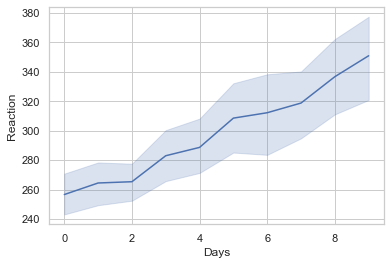

In [115]:
sns.lineplot(data=sleepstudy, y='Reaction', x='Days')